In [1]:
from utils import read_test_case3_from_txt
import matplotlib.pyplot as plt
import networkx as nx

m ,clauses = read_test_case3_from_txt("./Testcase_Q3.txt")

In [2]:
class Graph:
    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.adj_matrix = [[0 for _ in range(num_vertices)] for _ in range(num_vertices)]

    def add_edge(self, u, v):
        self.adj_matrix[u-1][v-1] = 1
        self.adj_matrix[v-1][u-1] = 1

def sat_to_vertex_cover(clauses):
    # Count number of distinct variables
    variables = set()
    for clause in clauses:
        for literal in clause:
            variables.add(abs(literal))
    n = len(variables)
    m = len(clauses)

    num_vertices = 2 * n + 3 * m
    graph = Graph(num_vertices)
    literal_to_vertex = {}
    vertex_count = 2 * n

    # Create vertices for literals
    for var in variables:
        vertex_true = 2 * var - 1
        vertex_false = 2 * var
        literal_to_vertex[var] = (vertex_true, vertex_false)
        graph.add_edge(vertex_true, vertex_false)

    # Create triangles for clauses and connect them to literal vertices
    for clause in clauses:
        triangle_base = vertex_count + 1
        vertex_count += 3

        for i, literal in enumerate(clause):
            literal_vertex = literal_to_vertex[abs(literal)][0 if literal > 0 else 1]
            graph.add_edge(triangle_base + i, literal_vertex)

        # Connect the vertices in the triangle
        graph.add_edge(triangle_base, triangle_base + 1)
        graph.add_edge(triangle_base + 1, triangle_base + 2)
        graph.add_edge(triangle_base + 2, triangle_base)

    return n,m,graph

In [3]:
n,m,graph = sat_to_vertex_cover(clauses)

print(2*n+3*m)
print(n+2*m)
# Print the adjacency matrix
for row in graph.adj_matrix:
    print(' '.join(map(str, row)))

17
10
0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0
0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0
1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0
0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1
0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0


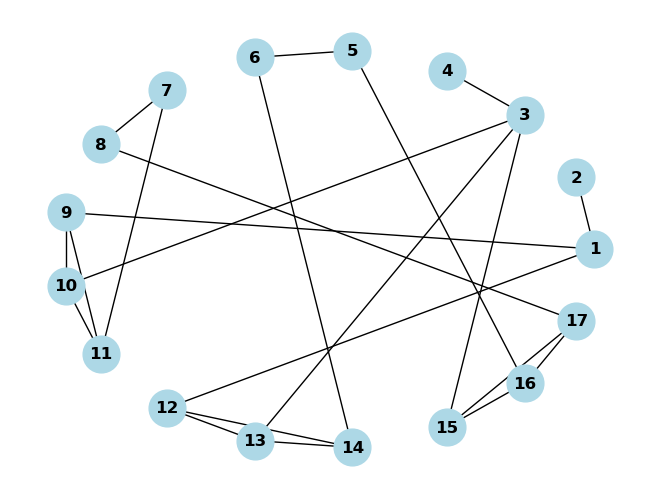

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(adj_matrix):
    G = nx.Graph()
    num_vertices = len(adj_matrix)

    # Add nodes
    G.add_nodes_from(range(1, num_vertices + 1))

    # Add edges
    for i in range(num_vertices):
        for j in range(i+1, num_vertices):
            if adj_matrix[i][j] == 1:
                G.add_edge(i + 1, j + 1)

    # Draw the graph
    nx.draw(G,pos=nx.circular_layout(G), with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
    plt.show()

# Assuming graph.adj_matrix is the adjacency matrix from the previous code
draw_graph(graph.adj_matrix)


In [5]:
adj_matrix = graph.adj_matrix
k = n+2*m

In [6]:
from itertools import combinations
# Q1 using vertex cover

def is_vertex_cover(adj_matrix, W):
    num_vertices = len(adj_matrix)
    for i in range(num_vertices):
        for j in range(num_vertices):
            if adj_matrix[i][j] == 1 and i not in W and j not in W:
                return False
    return True


num_vertices = len(adj_matrix)

# Generate combinations within the size limit 'k'
valid_vertex_covers = []
for r in range(1, k + 1):
    possible_W = combinations(range(num_vertices), r)
    for W in possible_W:
        if is_vertex_cover(adj_matrix, W):
            valid_vertex_covers.append(W)

# Output valid vertex covers within size limit 'k'
if valid_vertex_covers:
    print("Yes")
    for cover in valid_vertex_covers:
        print(' '.join(str(vertex + 1) for vertex in cover))
else:
    print("No")

Yes
1 3 5 7 9 10 12 14 15 17
1 3 5 7 9 10 12 14 16 17
1 3 5 7 9 10 13 14 15 17
1 3 5 7 9 10 13 14 16 17
1 3 5 7 9 11 12 14 15 17
1 3 5 7 9 11 12 14 16 17
1 3 5 7 9 11 13 14 15 17
1 3 5 7 9 11 13 14 16 17
1 3 5 7 10 11 12 14 15 17
1 3 5 7 10 11 12 14 16 17
1 3 5 7 10 11 13 14 15 17
1 3 5 7 10 11 13 14 16 17
1 3 5 8 9 11 12 14 15 16
1 3 5 8 9 11 12 14 15 17
1 3 5 8 9 11 12 14 16 17
1 3 5 8 9 11 13 14 15 16
1 3 5 8 9 11 13 14 15 17
1 3 5 8 9 11 13 14 16 17
1 3 5 8 10 11 12 14 15 16
1 3 5 8 10 11 12 14 15 17
1 3 5 8 10 11 12 14 16 17
1 3 5 8 10 11 13 14 15 16
1 3 5 8 10 11 13 14 15 17
1 3 5 8 10 11 13 14 16 17
1 3 6 7 9 10 12 13 16 17
1 3 6 7 9 10 12 14 16 17
1 3 6 7 9 10 13 14 16 17
1 3 6 7 9 11 12 13 16 17
1 3 6 7 9 11 12 14 16 17
1 3 6 7 9 11 13 14 16 17
1 3 6 7 10 11 12 13 16 17
1 3 6 7 10 11 12 14 16 17
1 3 6 7 10 11 13 14 16 17
1 3 6 8 9 11 12 13 15 16
1 3 6 8 9 11 12 13 16 17
1 3 6 8 9 11 12 14 15 16
1 3 6 8 9 11 12 14 16 17
1 3 6 8 9 11 13 14 15 16
1 3 6 8 9 11 13 14 16 17
1 3 6 8 

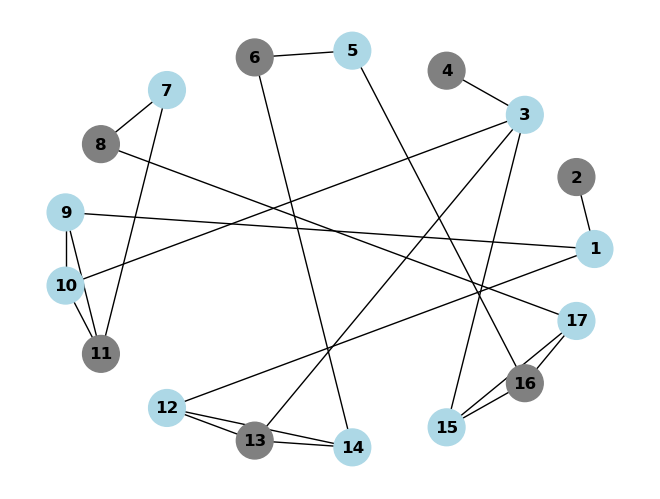

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph_with_vertex_cover(adj_matrix, vertex_cover):
    G = nx.Graph()
    num_vertices = len(adj_matrix)

    # Add nodes
    G.add_nodes_from(range(1, num_vertices + 1))

    # Add edges
    for i in range(num_vertices):
        for j in range(i+1, num_vertices):
            if adj_matrix[i][j] == 1:
                G.add_edge(i + 1, j + 1)

    # Node colors: blue for vertex cover, gray for others
    node_colors = ['lightblue' if (i + 1) in vertex_cover else 'gray' for i in range(num_vertices)]

    # Draw the graph
    pos = nx.circular_layout(G)
    nx.draw(G,pos, with_labels=True, node_color=node_colors, font_weight='bold', node_size=700)
    plt.show()

# Assuming graph.adj_matrix is the adjacency matrix from the previous code
# Manually specify a vertex cover (this is just an example and might not be optimal)
valid_vertex_covers = [[x+1 for x in row] for row in valid_vertex_covers]
vertex_cover = valid_vertex_covers[0]  # Example vertex cover nodes
draw_graph_with_vertex_cover(graph.adj_matrix, vertex_cover)
